# Info
Name:  

    COSR_DARE

Purpose:  

    To Build the COSR DARE calculations
  
Input:

    arguments
  
Output:

    Figure and save files
  
Keywords:

    none
  
Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-10-04
    Modified: 

# Prepare python environment

In [119]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
from datetime import datetime
from scipy.interpolate import UnivariateSpline, interp1d
from scipy import interpolate 
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
name = 'COSR'
vv = 'v1'

In [4]:
fp =getpath('COSR')
fp_rtm = '/nobackup/sleblan2/rtm/'
fp_uvspec = '/u/sleblan2/libradtran/libRadtran-2.0-beta/bin/uvspec'
fp_rtmdat = '/nobackup/sleblan2/COSR/rtm/' #'/u/sleblan2/4STAR/rtm_dat/'

Return path named:  COSR /mnt/c/Users/lebla/Research/COSR/


In [5]:
day = '20180624'

## Setup command line interface

In [6]:
import argparse

In [7]:
long_description = """    Prepare or save the direct Aerosol radiative effect files for calculations. """

In [32]:
parser = argparse.ArgumentParser(description=long_description)
parser.add_argument('-doread','--doread',help='if set, will only read the output, not produce them',
                    action='store_true')
parser.add_argument('-d','--daystr',nargs='?',help='The day string (yyyymmdd) for the desired flight data. Defaults to 20180624')

_StoreAction(option_strings=['-d', '--daystr'], dest='daystr', nargs='?', const=None, default=None, type=None, choices=None, help='The day string (yyyymmdd) for the desired flight data. Defaults to 20180624', metavar=None)

In [9]:
in_ = vars(parser.parse_args())
do_read = in_.get('doread',False)
day = in_.get('daystr','20180624')

usage: ipykernel_launcher.py [-h] [-doread]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/sleblanc/.local/share/jupyter/runtime/kernel-675fec48-fd38-4288-acae-f5ab90ce1cf4.json


SystemExit: 2

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Load files

## Load the in situ files

In [11]:
## neph = sio.loadmat(fp+'20180624_nephclap.csv_20191004_152550.mat.mat')

IOError: [Errno 2] No such file or directory: u'/mnt/c/Users/lebla/Research/COSR/20180624_nephclap.csv_20191004_152550.mat.mat'

In [15]:
## neph.keys()

['__function_workspace__', 'None', '__version__', '__header__', '__globals__']

In [28]:
## neph['None'][0][4]

IndexError: invalid index (4)

In [33]:
situ = pd.read_csv(fp+'data_other/{}_nephclap.csv'.format(day))

In [34]:
situ

,DateTimeUTC,totScat_450nm,totScatCalc_500nm,totScat_550nm,totScat_700nm,scatFitSlope,scatFitIncpt,angScat,totAbs_467nm,totAbsCalc_500nm,totAbs_528nm,totAbs_652nm,absFitSlope,absFitIncpt,angAbs,extCalc500nm
0,2018-06-24 14:14:00,1.80,1.402245,1.17,0.52,-2.828733,17.917542,2.828733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-24 14:15:00,1.43,1.281489,1.28,0.59,-2.043880,12.949936,2.043880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-24 14:16:00,1.81,1.484451,1.24,0.79,-1.876155,12.054614,1.876155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-24 14:17:00,2.00,1.672541,1.47,0.82,-2.031338,13.138311,2.031338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-24 14:18:00,2.32,1.898734,1.55,1.10,-1.680126,11.082512,1.680126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-06-24 14:19:00,2.32,1.908862,1.64,0.92,-2.103533,13.719140,2.103533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-06-24 14:20:00,2.21,2.037622,2.06,1.09,-1.634308,10.868368,1.634308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-06-24 14:20:58,3.79,3.130448,3.22,0.71,-3.873120,25.211101,3.873120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-06-24 14:20:59,4.10,3.137733,2.52,1.21,-2.771368,18.366468,2.771368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-06-24 14:21:00,3.91,2.798897,2.09,0.92,-3.279057,21.407277,3.279057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
insitu = situ.to_dict('list')

In [36]:
insitu.keys()

['totScat_450nm',
 'totScat_700nm',
 'scatFitSlope',
 'totScat_550nm',
 'totAbs_528nm',
 'totAbs_467nm',
 'totAbsCalc_500nm',
 'totAbs_652nm',
 'totScatCalc_500nm',
 'DateTimeUTC',
 'angScat',
 'angAbs',
 'absFitSlope',
 'extCalc500nm',
 'absFitIncpt',
 'scatFitIncpt']

In [37]:
insitu['ssa_500nm'] = np.array(insitu['totScatCalc_500nm'])/np.array(insitu['extCalc500nm'])

<IPython.core.display.Javascript object>


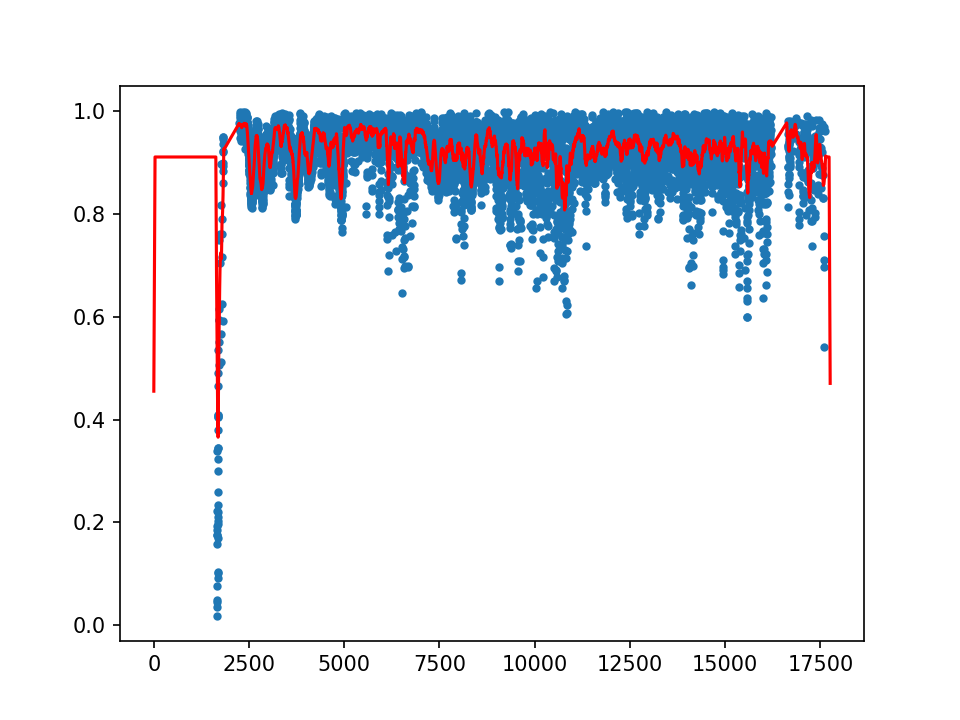

In [38]:
plt.figure()
plt.plot(insitu['ssa_500nm'],'.')
plt.plot(Sp.smooth(insitu['ssa_500nm'],60,old=True),'-r')

In [314]:
ssa_insitu = Sp.smooth(insitu['ssa_500nm'],60,old=True)

In [315]:
len(ssa_insitu)

17758

In [316]:
len(s['utc'])

17661

## Load the 4STAR AOD

In [331]:
import os

In [332]:
os.path.exists(fp+'os_data/4STAR_{}starsun.mat'.format(day))

True

In [334]:
s = sio.loadmat(fp+'os_data/4STAR_{}starsun.mat'.format(day))

In [335]:
s.keys()

['El_gnd',
 'Str',
 'tau_O3_err',
 'sza',
 'nirfilen',
 'toggle',
 'pitch',
 'Tst',
 'cwv',
 'fwhm',
 'flagsO3',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'tau_aero_subtract_all',
 'nirheader',
 'nirdatatype',
 'sd_aero_crit',
 'tau_aero_err',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'm_ray',
 'm_err',
 'forj_corr',
 'tau_O4_err',
 'flagsNO2',
 't',
 'c0mod',
 'tau_tot_slant',
 'track_err',
 'rate',
 'daystr',
 'program_version',
 'sat_time',
 'm_O3',
 'tau_aero_err2',
 'visheader',
 'Az_deg',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'visdatatype',
 'QdVtot',
 'tau_aero_err7',
 'tau_aero_err6',
 'tau_aero_err5',
 'nirAVG',
 'tau_tot_vert',
 'sun_sky_Az_offset',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'tau_aero_err8',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'w_isubset_for_polyfit',
 'AZ_d

In [336]:
s['utc'] = lu.toutc(lu.mat2py_time(s['t']))

### use the polyfit aod on the wavelength array

In [337]:
s['tau_aero_polynomial'].shape

(17661, 3)

In [338]:
wvl = np.array([0.35,0.4,0.5,0.675,0.87,0.995,1.2,1.4,1.6,2.1,4.0])

In [356]:
s['aod'] = np.zeros((len(s['utc']),len(wvl)))
for i in xrange(len(s['utc'])):
    s['aod'][i,:] = np.exp(np.polyval([s['tau_aero_polynomial'][i,0],s['tau_aero_polynomial'][i,1],s['tau_aero_polynomial'][i,2]],
                                         np.log(wvl)))


In [357]:
s['aod'].shape

(17661, 11)

In [358]:
s['aod'][10:-1:200,:].shape

(89, 11)

<IPython.core.display.Javascript object>


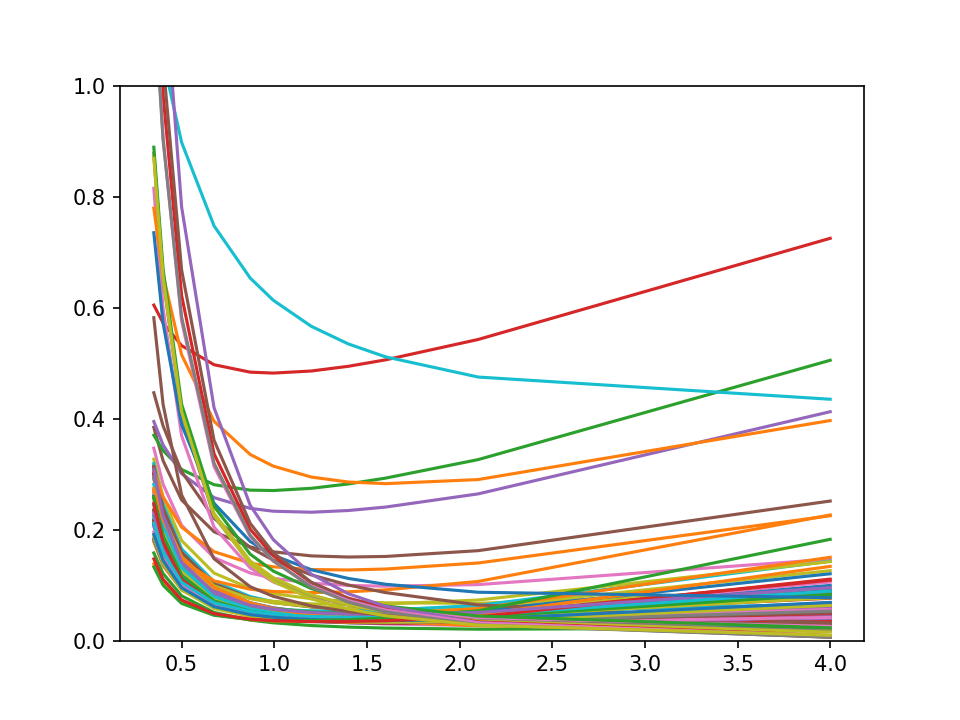

(0, 1)

In [360]:
plt.figure()
plt.plot(wvl,s['aod'][10:-1:200,:].T)
plt.ylim(0,1)

### Load the flag files

In [362]:
fmat = getpath('4STAR_data')

Return path named:  4STAR_data /mnt/c/Users/lebla/Research/4STAR_codes/data_folder//


In [365]:
with open (fmat+'starinfo_{}.m'.format(day), 'rt') as in_file:
    for line in in_file:
        if 'flagfilename ' in line:
            ff = line.split("'")[1]
sf = hs.loadmat(fmat+ff)

In [366]:
sf.keys()

[u'unspecified_clouds',
 u'manual_flags',
 u'bad_aod',
 u'flagfile',
 u'screen',
 u'frost',
 u'before_or_after_flight',
 u'unspecified_aerosol',
 u'hor_legs',
 u'flags',
 u'low_cloud',
 u'smoke',
 u'time',
 u'dust',
 u'vert_legs',
 u'screened',
 u'cirrus']

In [377]:
flag = sf['manual_flags']['good'][0,:,0]

In [378]:
flag.shape

(17661,)

In [379]:
sum(flag)

12608

## Load the skyscan results

In [77]:
fp_name = '4STAR_20180624_135_SKYP.created_20190329_003621.ppl_lv15.mat'
sky = sio.loadmat(fp+fp_name)

In [32]:
sky.keys()

['sky_radiances_pct_diff',
 'ext_fine',
 'flux_dn',
 'Sphericity_err',
 'Sphericity',
 'sky_radiances_angle',
 'sky_radiances_measured',
 'ssa_total',
 'radius',
 'flux_diffuse',
 'sfc_alb',
 'input_fname',
 'ssa_coarse',
 'sky_bias',
 'aaod',
 'fstem',
 'tod_fit',
 'output_fname',
 'g_coarse',
 'tod_meas',
 'input',
 'PF_coarse',
 'PF_total',
 'PF_fine',
 'aod',
 'g_fine',
 'refractive_index_real_r',
 'refractive_index_imaginary_r',
 'tod_meas_less_fit',
 'g_tot',
 'psd',
 'Wavelength',
 'PF_angle',
 '__version__',
 'ext_coarse',
 'ext_total',
 '__header__',
 '__globals__',
 'flux_up',
 'ssa_fine',
 'sky_radiances_fit',
 'sky_error']

# Plot out some data

## Plot out the retrieved skyscans

<IPython.core.display.Javascript object>


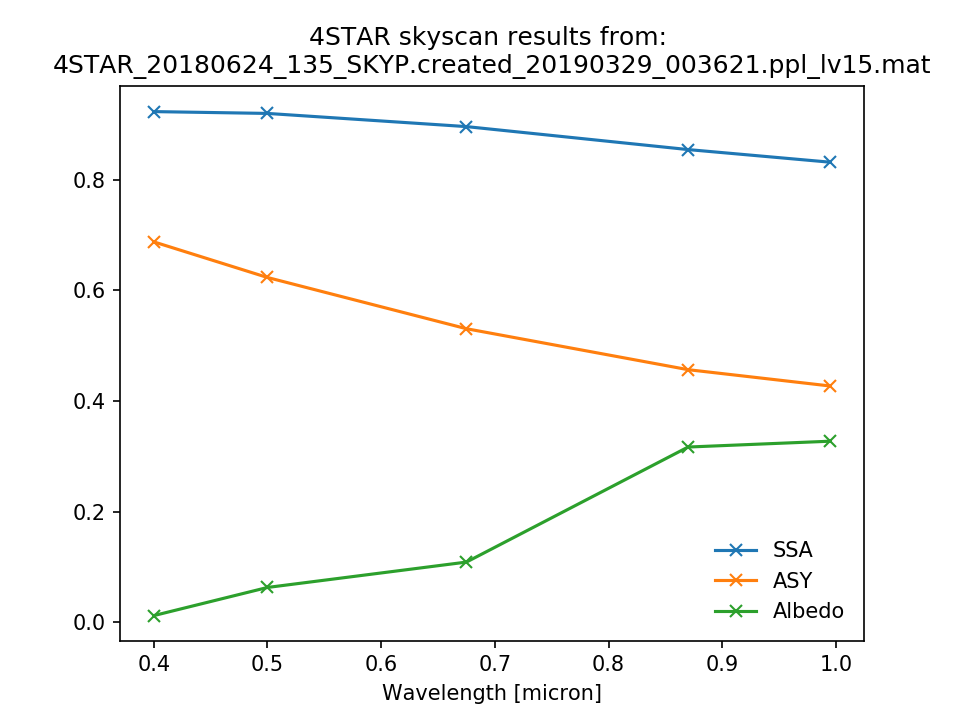

In [204]:
plt.figure()
plt.plot(sky['Wavelength'],sky['ssa_total'][0,:],'x-',label='SSA')
plt.plot(sky['Wavelength'],sky['g_tot'][0,:],'x-',label='ASY')
plt.plot(sky['Wavelength'],sky['sfc_alb'][0,:],'x-',label='Albedo')


plt.legend(frameon=False)
plt.xlabel('Wavelength [micron]')
plt.title('4STAR skyscan results from: \n' + fp_name)
plt.savefig(fp+'plots/4STAR_skyscan_result_20180624_135_SKYP.png',dpi=600,transparent=True)

In [232]:
sky['g_tot'][-1]

array([0.68756599, 0.62320095, 0.53069208, 0.45669369, 0.42719806])

In [295]:
wvl = np.array([0.35,0.4,0.5,0.675,0.87,0.995,1.2,1.4,1.6,2.1,4.0])
f_asy = interp1d(np.append(sky['Wavelength'][:,0],[1.1,1.2]),np.append(sky['g_tot'][0,:],[sky['g_tot'][0,-1]-0.008,sky['g_tot'][0,-1]-0.011]),
                 bounds_error=False,fill_value='extrapolate',kind='slinear')
asy = f_asy(wvl)
f_ssa = interp1d(np.append(sky['Wavelength'][:,0],[1.1,1.2,1.3]),np.append(sky['ssa_total'][0,:],[sky['ssa_total'][0,-1]-0.008,sky['ssa_total'][0,-1]-0.01,sky['ssa_total'][0,-1]-0.014]),
                 bounds_error=False,fill_value='extrapolate',kind='slinear')
ssa = f_ssa(wvl)
f_alb = interp1d(np.append(sky['Wavelength'][:,0],1.1),np.append(sky['sfc_alb'][0,:],sky['sfc_alb'][0,-1]+0.003),
                 bounds_error=False,fill_value='extrapolate',kind='slinear')
alb = f_alb(wvl)

In [283]:
np.append(sky['ssa_total'][0,:],[sky['ssa_total'][0,-1]-0.008,sky['ssa_total'][0,-1]-0.002])

array([0.9229, 0.9196, 0.8958, 0.8543, 0.8315, 0.8235, 0.8295])

<IPython.core.display.Javascript object>


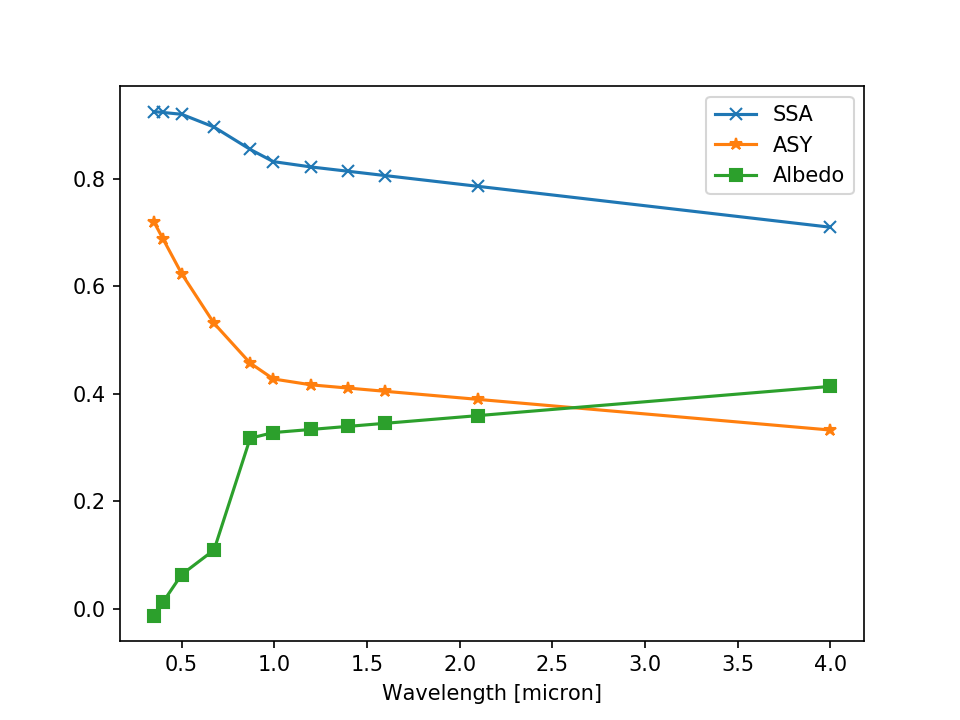

Text(0.5,0,'Wavelength [micron]')

In [298]:
plt.figure()
plt.plot(wvl,ssa,'-x',label='SSA')
plt.plot(wvl,asy,'-*',label='ASY')
plt.plot(wvl,alb,'-s',label='Albedo')
plt.legend()
plt.xlabel('Wavelength [micron]')

## Get the vertical dependence of the extinction

In [40]:
gu = pd.to_datetime(situ['DateTimeUTC']).to_list()
insitu['utc'] = np.array([g.hour+g.minute/60.0+g.second/3600.0 for g in gu])

In [41]:
from scipy.interpolate import interp1d

In [42]:
f_alt = interp1d(x=s['utc'],y=s['Alt'][:,0])
insitu['alt'] = f_alt(insitu['utc'])

<IPython.core.display.Javascript object>


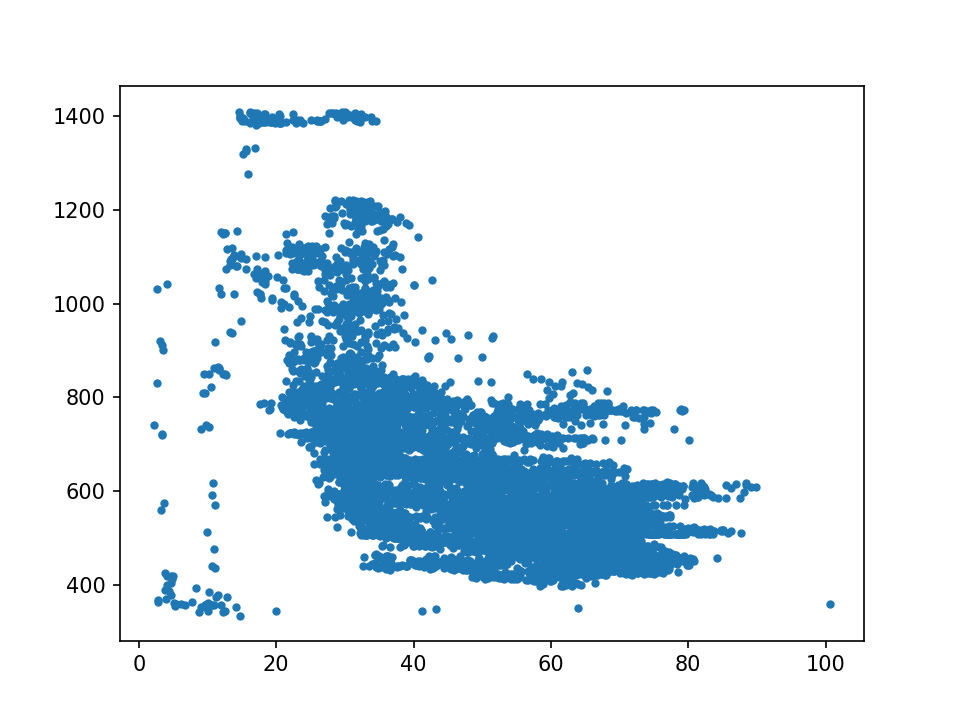

In [43]:
plt.figure()
plt.plot(insitu['extCalc500nm'],insitu['alt'],'.')

<IPython.core.display.Javascript object>


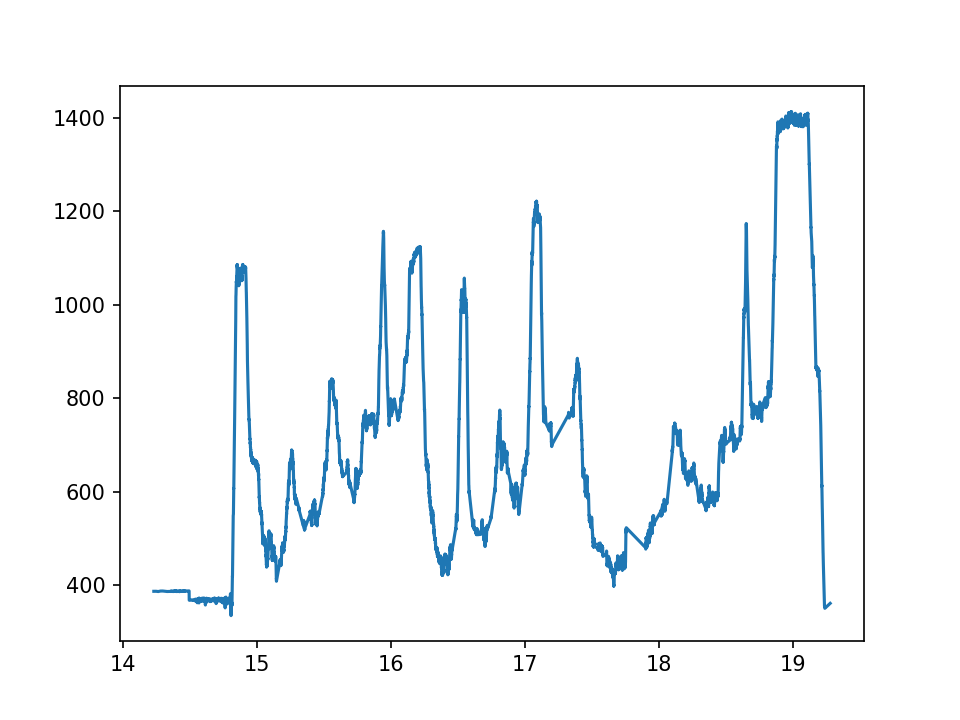

In [26]:
plt.figure()
plt.plot(insitu['utc'],insitu['alt'])

<IPython.core.display.Javascript object>


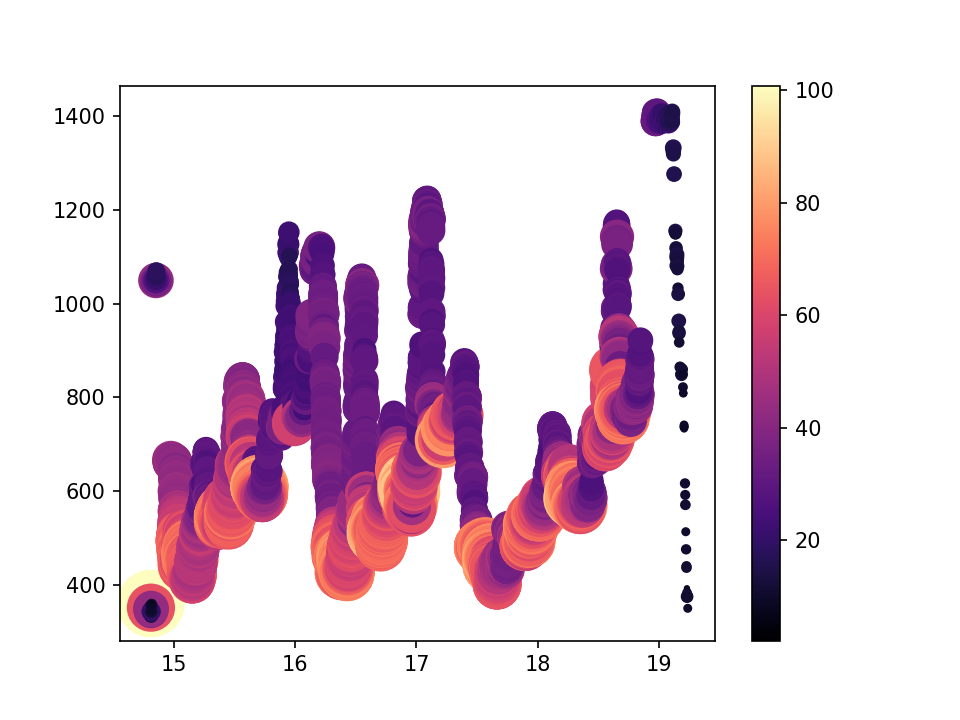

In [197]:
plt.figure()
plt.scatter(insitu['utc'],insitu['alt'],c=insitu['extCalc500nm'],cmap=plt.cm.magma,s=(insitu['extCalc500nm'])**1.5-20.0)
plt.colorbar()

In [67]:
insitu['extCalc500nm'] = np.array(insitu['extCalc500nm'])

In [71]:
np.isfinite(insitu['extCalc500nm'])

array([False, False, False, ..., False, False, False])

In [160]:
binned_ext,binned_alt,binned_num = [],[],[]
for i in xrange(14):
    flaa = (insitu['alt']>=i*100.0) & (insitu['alt']<(i+1.0)*100.0) & (np.isfinite(insitu['extCalc500nm']))
    if flaa.any():
        binned_ext.append(insitu['extCalc500nm'][flaa])
        binned_alt.append(np.mean([i*100.0,(i+1.0)*100.0]))
        binned_num.append(len(insitu['extCalc500nm'][flaa]))

<IPython.core.display.Javascript object>


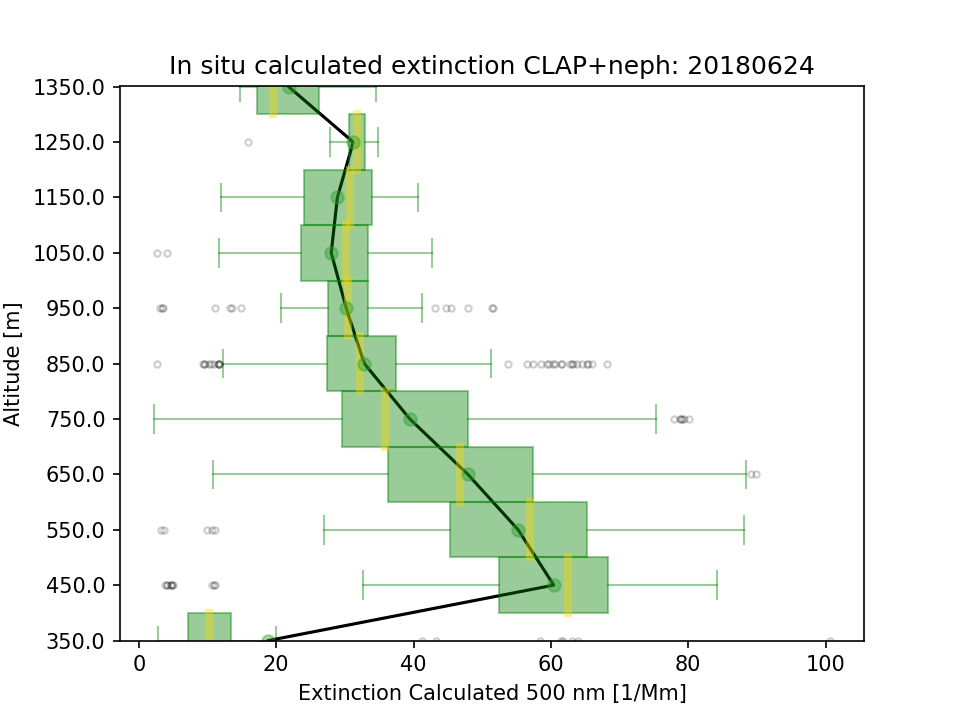

In [203]:
plt.figure()
bp =plt.boxplot(binned_ext,positions=binned_alt,vert=False,showfliers=True,widths=100,showmeans=True,patch_artist=True)
plt.xlabel('Extinction Calculated 500 nm [1/Mm]')
plt.ylabel('Altitude [m]')
#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
for b in bp['boxes']:
    b.set_facecolor('green')
    b.set_edgecolor('green')
    b.set_alpha(0.4)
for b in bp['means']:
    b.set_marker('o')
    b.set_color('firebrick')
    b.set_alpha(0.4)
for b in bp['whiskers']:
    b.set_linestyle('-')
    b.set_color('green')
    b.set_alpha(0.4)
for b in bp['caps']:
    b.set_alpha(0.4)
    b.set_color('green')
for b in bp['medians']:
    b.set_linewidth(4)
    b.set_color('gold')
    b.set_alpha(0.4)
for b in bp['fliers']:
    b.set_marker('.')
    b.set_alpha(0.2)
ext_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(ext_means[:,0],ext_means[:,1],'-k')
plt.title('In situ calculated extinction CLAP+neph: 20180624')
plt.savefig(fp+'plots/extinction_vertical_bins_clap_neph_20180624.png',dpi=600,transparent=True)

In [166]:
ext_z = ext_means[:,1]/1000.0
ext_ = ext_means[:,0]/1000.0
aod_ = ext_.sum()/10.0

In [312]:
nz = len(ext_z)

In [323]:
ext_,aod_

(array([0.01887655, 0.06041367, 0.05522762, 0.04790876, 0.03946096,
        0.03283407, 0.03020106, 0.02801399, 0.02891071, 0.03121669,
        0.02179804]), 0.03948621247357574)

# Now build the input files for DARE calculations


In [382]:
import Run_libradtran as RL

In [467]:
#get the paths
f = open(fp+'rtm/{}_CRE_{}.sh'.format(name,vv),'w')
fpp_in = '/nobackup/sleblan2/rtm/input/{}_CRE_{}/'.format(name,vv)
fpp_out = '/nobackup/sleblan2/rtm/output/{}_CRE_{}/'.format(name,vv)
fp_uv = '/u/sleblan2/libradtran/libRadtran-2.0-beta/bin/uvspec'
fp_in = fp+'rtm/input/CRE/'

In [456]:
geo = {'zout':[0,3,100],'year':2018,'month':6,'day':24,'hour':12,'minute':0,'second':0}
aero_base = {'z_arr':(ext_z+50.0)/1000.0,'wvl_arr':wvl,'ssa':np.array([ssa,]*nz),'asy':np.array([asy,]*nz)}
source = {'integrate_values':True,'dat_path':'/u/sleblan2/libradtran/libRadtran-2.0-beta/data/','run_fuliou':True}
albedo = {'create_albedo_file':True,'alb':alb,'alb_wvl':wvl}

In [457]:
fx_ssa_insitu = interp1d(insitu['utc'],ssa_insitu,bounds_error=False)
ssa_u = fx_ssa_insitu(s['utc'])
ssa_u[ssa_u<0.8] = np.nan

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [458]:
def expand_ext_vert_and_spect(ext_,ext_z,aod_sp,alt,wvl):
    """
    create a 2d array of extintion (altitude, spectra). 
    Inputs:
        ext_: vertical profile of ext, 
        ext_z: altitudes of profile [km], 
        aod_sp: aod spectra, 
        alt: measured alt [km]
        wvl: wavelength array of the aod_sp [microns]
    """
    iz = np.argmin(abs(ext_z-alt))
    iw = np.argmin(abs(wvl-0.5))
    aod_ = ext_[iz:].sum()/10.0
    
    factor = aod_sp[iw]/aod_
    exts = np.array([aod_sp*e for e in ext_])*factor
    return exts 

In [472]:
'{i:06d}'.format(i=5300)

'005300'

In [ ]:
try:
    file_list = file(fp_rtm+'COSR_DARE_list_file_{d}_{v}.sh'.format(d=day,v=vv),'w')
except Exception,e:
    print 'Problem with accessing file, return Exception: ',e
    return
print 'Starting list file'
fp_out = fp_rtm+'output/COSR_{d}_{v}/'.format(d=day,v=vv)
fp_in = fp_rtm+'input/COSR_{d}_{v}/'.format(d=day,v=vv)
if not os.path.exists(fp_out):
    os.mkdir(fp_out)
if not os.path.exists(fp_in):
    os.mkdir(fp_in)

fp_base_file = fp_out+'base.inp'
make_base = True
for i,u in enumerate(s['utc']):
    
    if flag[i] & np.isfinite(ssa_u[i]):
        aod = s['aod'][i,:]
        aero['ext'] = expand_ext_vert_and_spect(ext_,ext_z,s['aod'][i,:],s['Alt'][i]/1000.0,wvl)
        iw = np.argmin(abs(aero_base['wvl_arr']-0.5))
        aero['ssa'] = aero_base['ssa']*ssa_u[i]/aero_base['ssa'][0,iw]
        aero['asy'] = aero_base['asy']
        
        try: aero['ssa'][aero['ssa']<0.0] = 0.0
        except: pass
        try: aero['ssa'][aero['ssa']>1.0] = 1.0
        except: pass
        try: aero['asy'][aero['asy']<0.0] = 0.0
        except: pass
        try: aero['asy'][aero['asy']>1.0] = 1.0
        except: pass
        try: aero['ext'][aero['ext']<0.0] = 0.0
        except: pass
        
        geo['utc'] = u
        geo['sza'] = s['sza'][i]
        geo['lat'] = s['Lat'][i]
        geo['lon'] = s['Lon'][i]
        
        fname = 'COSR_DARE_{d}_{v}_{i:06d}.dat'.format(d=day,v=vv,i=i)
        
        
        if not list_only:
            RL.write_fuliou_input(file_in,geo=geo,aero=aero,albedo=albedo,verbose=False)

        file_list.write(fp_fuliou+' '+file_in+' '+file_out+'\n')
        print mmm,ilat,ilon

In [ ]:
    
    stdfac_dict = RL.merge_dicts({'ext':0.0,'ssa':0.0,'asym':0.0,
                                  'COD':0.0,'ref':0.0},stdfac_dict)
    make_base = True
    
                    #sanitize inputs after adding subtracting standard deviations
                try: aero['ssa'][aero['ssa']<0.0] = 0.0
                except: pass
                try: aero['ssa'][aero['ssa']>1.0] = 1.0
                except: pass
                try: aero['asy'][aero['asy']<0.0] = 0.0
                except: pass
                try: aero['asy'][aero['asy']>1.0] = 1.0
                except: pass
                
                aero['ext'] = np.array([aero['ext'],aero['ext']])
                aero['ssa'] = np.array([aero['ssa'],aero['ssa']])
                aero['asy'] = np.array([aero['asy'],aero['asy']])
                
                
                #for HH in xrange(24):
                geo['hour'] = lon/15.0*-1.0+12.0
                form = {'ilat':ilat,'ilon':ilon,'mmm':mmm}
                file_in = fp_out2+'AACFLin_lat{ilat:02.0f}_lon{ilon:02.0f}_{mmm}.datin'.format(**form)
                file_out = fp_output+'AACFLout_lat{ilat:02.0f}_lon{ilon:02.0f}_{mmm}.wrt'.format(**form)
                    
                if not list_only:
                    RF.write_fuliou_input(file_in,geo=geo,aero=aero,albedo=albedo,verbose=False)
              
                file_list.write(fp_fuliou+' '+file_in+' '+file_out+'\n')
                print mmm,ilat,ilon
        del alb_geo
        del input_mmm
        file_list.close()

# Plotting
Present some fo the early plots here